# Monty Hall Problem Simulation
---
## Introduction
The Monty Hall problem is a famous probability puzzle named after the host of the American television game show *Let's Make a Deal,* Monty Hall. It's a fun and classic thought experiment in probability. The problem is as follows:

You are a contestant on a game show and presented with three doors. Behind one of the doors is a valuable prize, such as a car, while the other two doors conceal goats. Your goal is to select the door that hides the car and win the prize.

Here's how the game unfolds:

Initially, you choose one of the three doors, let's say Door 1.
After you make your choice, the host, Monty Hall, who knows what is behind each door, opens one of the remaining two doors to reveal a goat. For example, if you chose Door 1, Monty might open Door 3 to reveal a goat.
At this point, you are presented with a new decision: stick with your original choice (Door 1) or switch your choice to the other unopened door (Door 2).
The question is: What should you do to maximize your chances of winning the car? Should you stick with your initial choice or switch doors?

The surprising answer is that **you should always switch doors to maximize your chances of winning the car.** Switching doors gives you a 2/3 (66.67%) probability of winning, while sticking with your initial choice only gives you a 1/3 (33.33%) chance.

To confirm our probabilites, lets simulate the game and repeat it 10,000 times:

In [1]:
import random

def simulate_monty_hall(switch):
    doors = ['goat', 'goat', 'car']
    random.shuffle(doors)  # Randomly arrange the doors

    # Randomly choose a door
    choice = random.randint(0, 2)

    # Host reveals a goat
    revealed = [i for i in range(3) if i != choice and doors[i] == 'goat']
    reveal = random.choice(revealed)

    if switch:
        # Switch to the other unopened door
        new_choice = [i for i in range(3) if i != choice and i != reveal][0]
        final_choice = new_choice
    else:
        # Stick with the initial choice
        final_choice = choice

    # Determine the outcome
    outcome = doors[final_choice]
    return outcome == 'car'

# Perform simulations
num_simulations = 10000
switch_wins = 0
stick_wins = 0

for _ in range(num_simulations):
    switch_wins += simulate_monty_hall(True)
    stick_wins += simulate_monty_hall(False)

# Calculate probabilities
switch_win_prob = switch_wins / num_simulations
stick_win_prob = stick_wins / num_simulations

# Print results
print("Switching doors win probability:", switch_win_prob)
print("Sticking with initial choice win probability:", stick_win_prob)


Switching doors win probability: 0.6659
Sticking with initial choice win probability: 0.3416


In this code, the `simulate_monty_hall` function takes a switch argument indicating whether you want to switch doors (`True`) or stick with the initial choice (`False`). It randomly shuffles the doors, simulates the host's reveal of a goat, and determines the final choice based on the specified strategy.

The code then performs a specified number of simulations (`num_simulations`) and keeps track of the number of wins for switching doors and sticking with the initial choice. Finally, it calculates the probabilities by dividing the wins by the total number of simulations and prints the results.

This confirms our probabilities, but why? Lets first define and gain intuition around variable change. Then we'll showcase variable change through a 100 door simulation to highlight its impact.

## Variable Change

Variable change refers to the transformation or modification of variables that affect the probabilities of different events or outcomes. It involves updating or adjusting the probabilities based on new information or conditions.

In the Monty Hall problem, the variable change occurs when the host reveals a goat behind one of the unchosen doors. **This new information allows you to update the probabilities associated with the remaining doors**. 

By revealing a goat, the host effectively eliminates one of the incorrect choices. To highlight the impact of variable change, let's simulate the problem again, only this time with 100 doors, 99 goats and 1 car:

In [2]:
import random

def simulate_monty_hall(num_doors, switch):
    doors = ['goat'] * (num_doors - 1) + ['car']
    random.shuffle(doors)  # Randomly arrange the doors

    # Randomly choose a door
    choice = random.randint(0, num_doors - 1)

    # Monty opens all other doors except the chosen door and one with a car
    revealed = [i for i in range(num_doors) if i != choice and doors[i] == 'goat']

    # If switching, choose the unopened door other than the initial choice
    if switch:
        unopened_doors = [i for i in range(num_doors) if i != choice and i not in revealed]
        if len(unopened_doors) == 0:
            return False  # No unopened doors available, cannot switch
        final_choice = random.choice(unopened_doors)
    else:
        final_choice = choice

    # Determine the outcome
    outcome = doors[final_choice]
    return outcome == 'car'

# Perform simulations
num_simulations = 10000
num_doors = 100
switch_wins = 0
stick_wins = 0

for _ in range(num_simulations):
    switch_wins += simulate_monty_hall(num_doors, True)
    stick_wins += simulate_monty_hall(num_doors, False)

# Calculate probabilities
switch_win_prob = switch_wins / num_simulations
stick_win_prob = stick_wins / num_simulations

# Print results
print("Switching doors win probability:", switch_win_prob)
print("Sticking with initial choice win probability:", stick_win_prob)


Switching doors win probability: 0.9887
Sticking with initial choice win probability: 0.0105


With 100 doors, if we change our pick, we win almost every time! Lets visualize the differences in probability from 100 doors to our original 3 door example.

## Vizualization

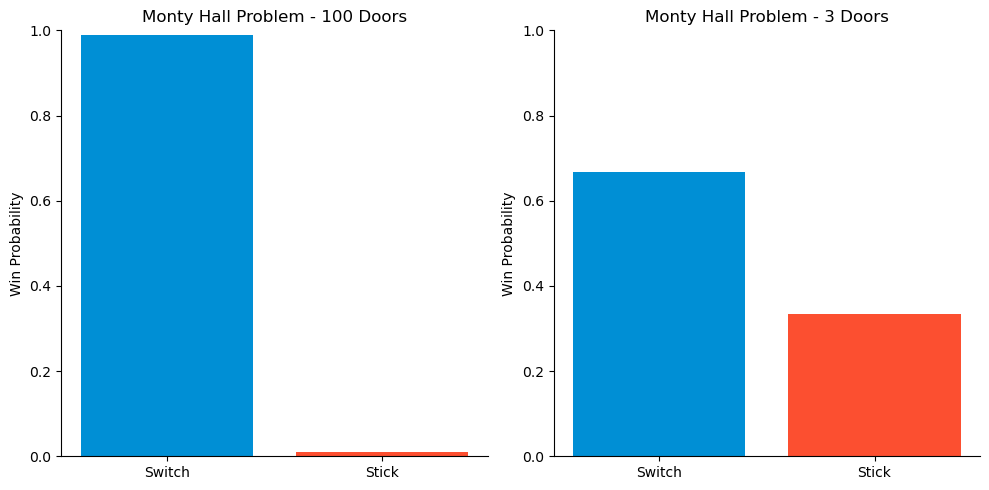

In [3]:
import matplotlib.pyplot as plt

def visualize_probabilities(num_doors, switch_win_prob, stick_win_prob):
    labels = ['Switch', 'Stick']
    probabilities = [switch_win_prob, stick_win_prob]

    plt.style.use('default')  # Reset to default style
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].bar(labels, probabilities, color=['#008FD5', '#FC4F30'])
    ax[0].set_ylabel('Win Probability')
    ax[0].set_title('Monty Hall Problem - {} Doors'.format(num_doors))
    ax[0].set_ylim([0, 1])  # Set y-axis range to 0 to 1
    ax[0].spines['top'].set_visible(False)  # Hide top spine
    ax[0].spines['right'].set_visible(False)  # Hide right spine
    ax[0].xaxis.set_ticks_position('bottom')  # Show ticks only at the bottom

    # Add the 3-door example
    ax[1].bar(labels, [0.667, 0.333], color=['#008FD5', '#FC4F30'])
    ax[1].set_ylabel('Win Probability')
    ax[1].set_title('Monty Hall Problem - 3 Doors')
    ax[1].set_ylim([0, 1])  # Set y-axis range to 0 to 1
    ax[1].spines['top'].set_visible(False)  # Hide top spine
    ax[1].spines['right'].set_visible(False)  # Hide right spine
    ax[1].xaxis.set_ticks_position('bottom')  # Show ticks only at the bottom

    plt.tight_layout()
    plt.show()

# Perform simulations - 100 doors
num_simulations = 10000
num_doors = 100
switch_wins = 0
stick_wins = 0

for _ in range(num_simulations):
    switch_wins += simulate_monty_hall(num_doors, True)
    stick_wins += simulate_monty_hall(num_doors, False)

# Calculate probabilities - 100 doors
switch_win_prob_100 = switch_wins / num_simulations
stick_win_prob_100 = stick_wins / num_simulations

# Perform simulations - 3 doors
num_simulations = 10000
num_doors = 3
switch_wins = 0
stick_wins = 0

for _ in range(num_simulations):
    switch_wins += simulate_monty_hall(num_doors, True)
    stick_wins += simulate_monty_hall(num_doors, False)

# Calculate probabilities - 3 doors
switch_win_prob_3 = switch_wins / num_simulations
stick_win_prob_3 = stick_wins / num_simulations

# Visualize probabilities
visualize_probabilities(num_doors=100, switch_win_prob=switch_win_prob_100, stick_win_prob=stick_win_prob_100)


## Conclusion

The correct intuition underlying this problem is that of **concentration**. 

In the 100 door game, when monty opens 98 doors, revealing 98 goats, that 98/100 probability essentially gets concentrated into the remaining available door. By this intuition its clear that you should switch because the probaility of the car being in the 98/100 was just concentrated into only 1 door. The results of that concentrated outcome is shown above left.

In the original 3 door game, the same intution applies. The 2/3 probability that the car is in one of the 2 remaining unpicked doors is concentrated into just one door when monty opens his door. This results in a free additional 1/3 probability when you switch doors.

Always account for variable change and note the concentration of probabilites. 

Hopefully now its clear why you should always switch your pick. Thanks for reading!
-Jake